In [1]:
import os
import random
import pandas as pd #導入pandas函式庫(用於資料處理)
import numpy as np
import matplotlib.pyplot as plt#導入matplotlib函式庫(用於繪圖)
import seaborn as sns#導入seaborn函式庫(用於繪圖)
#導入各種函式庫

In [2]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

讀取全部資料並合併

In [3]:
train_file_paths = [f'36_TrainingData/L{i}_Train.csv' for i in range(1, 18)]#讀取全部訓練資料
df_list = [pd.read_csv(file) for file in train_file_paths]
df_data = pd.concat(df_list, ignore_index=True)#將訓練資料合併
df_all_data = pd.concat(df_list, ignore_index=True)

讀取單一資料

In [4]:
i = input('請輸入要讀取的資料編號(1~17):')
while i.isdigit() == False or int(i) < 1 or int(i) > 17:
    i = input('輸入錯誤，請重新輸入:')
    
train_file_paths_single = f'36_TrainingData/L{i}_Train.csv'#讀取單一資料
df_data = pd.read_csv(train_file_paths_single)
print(f'已讀取第{i}筆資料')

已讀取第1筆資料


In [8]:
df_data["DateTime"] = pd.to_datetime(df_data["DateTime"])#將時間轉換為pandas的時間格式
df_data.describe()#顯示資料的描述性統計
#df_data.isnull().sum(axis=0)

NameError: name 'freq' is not defined

<Axes: >

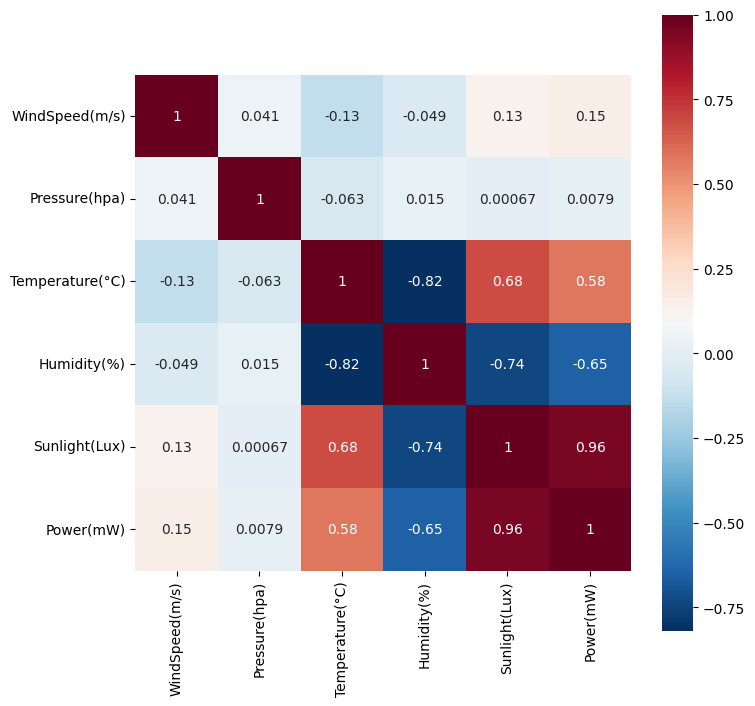

In [7]:
# correlation 計算
corr = df_data[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, square=True, annot=True, cmap="RdBu_r")

In [ ]:
#df_data = df_data.drop(columns=['WindSpeed(m/s)', 'Pressure(hpa)'])


In [ ]:
df_data.boxplot(column=['Temperature(°C)'], figsize=(10, 10))

In [ ]:
df_data.boxplot(column=['Humidity(%)'], figsize=(10, 10))

In [ ]:
df_data.boxplot(column=['Sunlight(Lux)'], figsize=(10, 10))

In [ ]:
df_data.boxplot(column=['Power(mW)'], figsize=(10, 10))

In [173]:
df_data.to_csv(f'Analysised_TrainData/L{i}_Train_analysised.csv', index=False)
df_all_data.to_csv(f'Analysised_TrainData/All_Train_analysised.csv', index=False)
